In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('house_rental_data.csv (1).txt',index_col ='Unnamed: 0' )

In [3]:
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000
647,1707.840,3,14,3,2,2,65000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [5]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True, drop = True)

In [6]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.00000,579.000000
mean,1516.918580,5.908463,10.778929,2.825561,1.803109,1.80829,61383.614853
std,776.655587,3.893511,5.027210,1.018328,0.477077,0.68816,35764.023105
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.00000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.00000,38000.000000
50%,1419.642000,5.000000,11.000000,3.000000,2.000000,2.00000,50000.000000
75%,1891.077000,8.000000,14.000000,4.000000,2.000000,2.00000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.00000,250000.000000


In [7]:
df.corr()['Price'].sort_values(ascending = False)

Price          1.000000
Sqft           0.823781
Bathroom       0.604204
Bedroom        0.465091
TotalFloor     0.336982
Living.Room    0.332643
Floor          0.226952
Name: Price, dtype: float64

array([[<Axes: title={'center': 'Sqft'}>,
        <Axes: title={'center': 'Floor'}>,
        <Axes: title={'center': 'TotalFloor'}>],
       [<Axes: title={'center': 'Bedroom'}>,
        <Axes: title={'center': 'Living.Room'}>,
        <Axes: title={'center': 'Bathroom'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >, <Axes: >]],
      dtype=object)

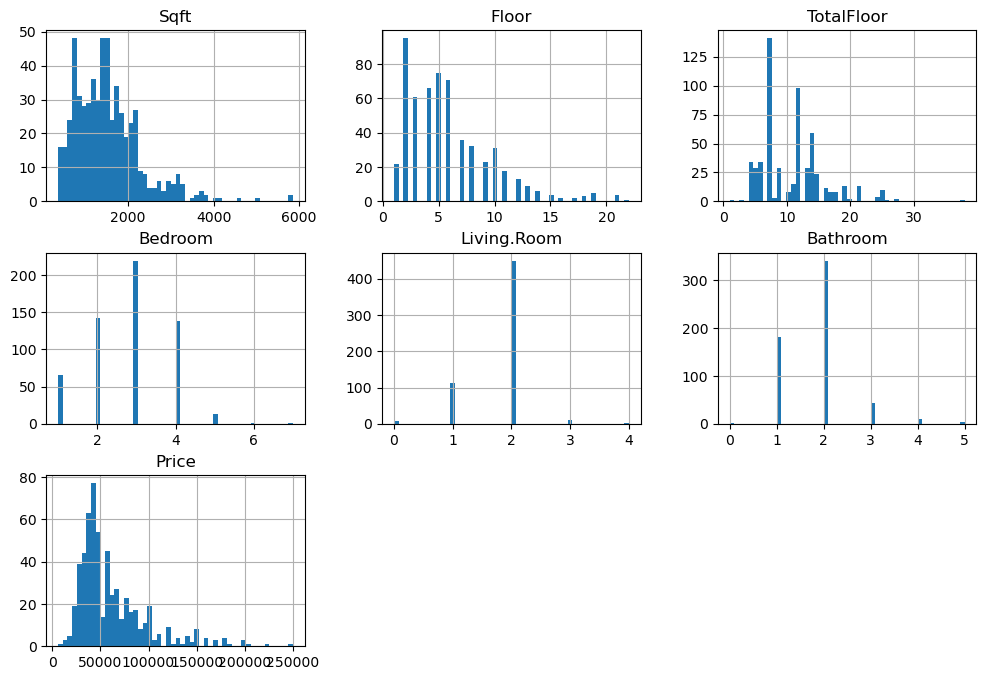

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins = 50,figsize = (12,8))

<Axes: >

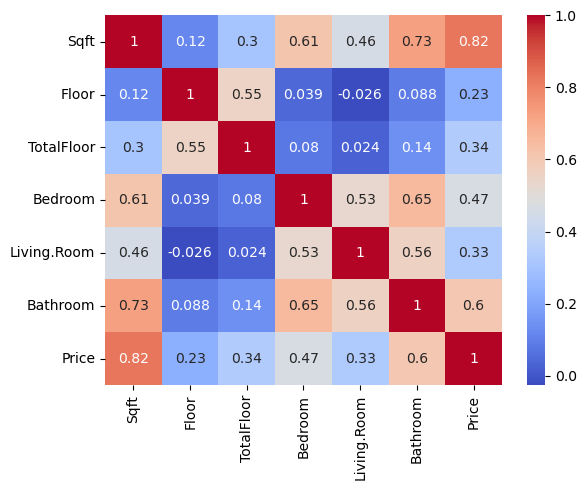

In [9]:
import seaborn as sns
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm')

<Axes: xlabel='Sqft', ylabel='Price'>

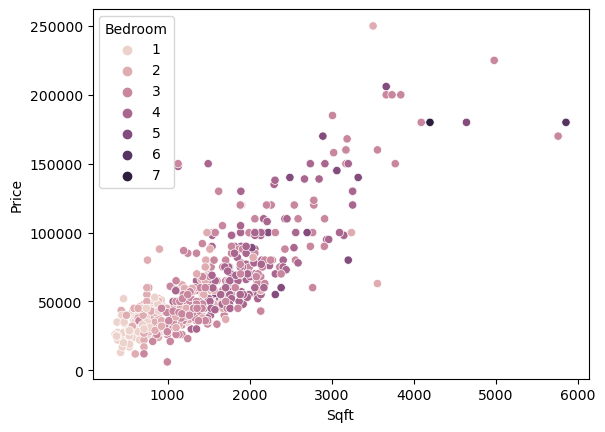

In [10]:
sns.scatterplot(x= 'Sqft',y = 'Price',data = df,hue  = 'Bedroom')

<Axes: xlabel='Price', ylabel='Count'>

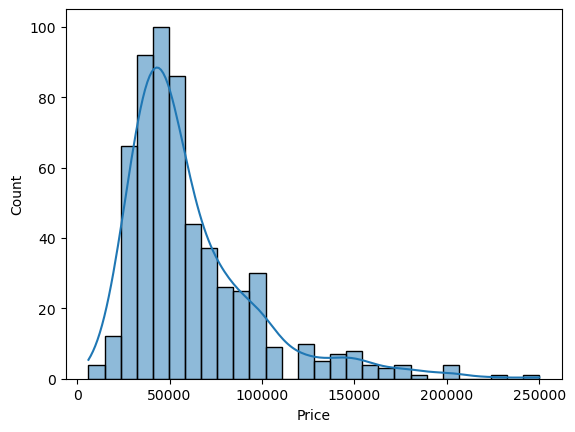

In [11]:
sns.histplot(df['Price'],kde = True)

<Axes: xlabel='Bedroom', ylabel='Price'>

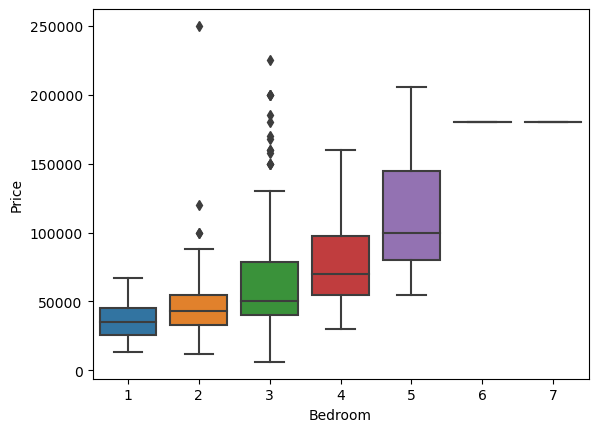

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data = df,x = 'Bedroom',y = 'Price')

In [13]:
x = df.drop(['Price'],axis = 1)
y = df['Price']

In [14]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred = lr.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

377312072.14461005